In [1]:
import os
# Changing the working directory
os.chdir('..')
os.getcwd()

'/home/javiermunoz/Universidad/MasterBDyDS/TFM/TFM_DSBD'

In [2]:
from config import DATA_PATH, VIDEOS_PATH
import pandas as pd
from sklearn.model_selection import train_test_split
from config import SPLITS
from numpy.random import default_rng
import shutil
import pathlib

## 0. Data Preparation

In [3]:
# Load the labels data
labels = pd.read_csv('./data/labels.csv')
labels

,gloss_id,gloss,hand
0,1,Opaque,R
1,2,Red,R
2,3,Green,R
3,4,Yellow,R
4,5,Bright,R
...,...,...,...
59,60,Copy,B
60,61,Run,B
61,62,Realize,R
62,63,Give,B


In [4]:
list_of_videos = os.listdir(VIDEOS_PATH)
print(f"The number of videos in the dataset is: {len(list_of_videos)}")

The number of videos in the dataset is: 3200


In [5]:
# Create a metadata dictionary
metadata_dict = {
    "video_id": [],
    "gloss_id": [],
    "interpreter_id": [],
    "take_id": []
}

for video_id in list_of_videos:
    str_splits = video_id.split("_")
    gloss_id, interpreter_id, take_id = int(str_splits[0]), str_splits[1], str_splits[2].split(".")[0]
    metadata_dict["gloss_id"].append(gloss_id)
    metadata_dict["interpreter_id"].append(interpreter_id)
    metadata_dict["take_id"].append(take_id)
    metadata_dict["video_id"].append(video_id)

metadata_df = pd.DataFrame(metadata_dict)
metadata_df

,video_id,gloss_id,interpreter_id,take_id
0,019_006_005.mp4,19,006,005
1,039_004_001.mp4,39,004,001
2,011_009_003.mp4,11,009,003
3,037_005_004.mp4,37,005,004
4,011_006_002.mp4,11,006,002
...,...,...,...,...
3195,019_002_004.mp4,19,002,004
3196,051_002_001.mp4,51,002,001
3197,051_003_001.mp4,51,003,001
3198,024_010_005.mp4,24,010,005


In [6]:
# Join both dictionaries
full_metadata_df = metadata_df.merge(labels, on='gloss_id')
full_metadata_df

,video_id,gloss_id,interpreter_id,take_id,gloss,hand
0,019_006_005.mp4,19,006,005,Bitter,R
1,019_006_001.mp4,19,006,001,Bitter,R
2,019_003_004.mp4,19,003,004,Bitter,R
3,019_002_001.mp4,19,002,001,Bitter,R
4,019_004_004.mp4,19,004,004,Bitter,R
...,...,...,...,...,...,...
3195,013_006_003.mp4,13,006,003,Away,R
3196,013_002_003.mp4,13,002,003,Away,R
3197,013_007_001.mp4,13,007,001,Away,R
3198,013_001_005.mp4,13,001,005,Away,R


In [7]:
# Check that there are no nulls
full_metadata_df.isnull().any(), full_metadata_df.isna().any()

(video_id          False
 gloss_id          False
 interpreter_id    False
 take_id           False
 gloss             False
 hand              False
 dtype: bool,
 video_id          False
 gloss_id          False
 interpreter_id    False
 take_id           False
 gloss             False
 hand              False
 dtype: bool)

In [8]:
metadata_4_train, metadata_4_test = train_test_split(full_metadata_df, test_size=0.2, shuffle=True)
metadata_4_val, metadata_4_test = train_test_split(metadata_4_test, test_size=0.4, shuffle=True)

In [9]:
metadata_4_train["sp"] = 'train'
metadata_4_val["sp"] = 'val'
metadata_4_test["sp"] = 'test'
full_metadata_df = pd.concat([metadata_4_train, metadata_4_val, metadata_4_test])
full_metadata_df.reset_index()
full_metadata_df

,video_id,gloss_id,interpreter_id,take_id,gloss,hand,sp
3139,042_001_003.mp4,42,001,003,Deaf,R,train
1221,023_008_002.mp4,23,008,002,Food,R,train
2158,040_007_003.mp4,40,007,003,Patience,R,train
1793,047_007_002.mp4,47,007,002,Chewing-gum,R,train
2639,059_004_002.mp4,59,004,002,Buy,R,train
...,...,...,...,...,...,...,...
410,061_007_002.mp4,61,007,002,Run,B,test
244,022_010_002.mp4,22,010,002,Water,R,test
1511,032_008_002.mp4,32,008,002,Photo,B,test
195,037_005_002.mp4,37,005,002,Ship,R,test


In [10]:
# we take a subset of classes from the whole dataset
rng = default_rng()
subset_size = 10
subset_labels = rng.choice(len(labels), size=subset_size, replace=False)

subset_metadata_df = full_metadata_df[full_metadata_df['gloss_id'].isin(subset_labels)]
subset_metadata_df.reset_index()
subset_metadata_df

,video_id,gloss_id,interpreter_id,take_id,gloss,hand,sp
1525,032_010_005.mp4,32,010,005,Photo,B,train
1506,032_005_001.mp4,32,005,001,Photo,B,train
1527,032_006_002.mp4,32,006,002,Photo,B,train
1515,032_002_001.mp4,32,002,001,Photo,B,train
165,037_006_005.mp4,37,006,005,Ship,R,train
...,...,...,...,...,...,...,...
1870,003_007_004.mp4,3,007,004,Green,R,test
2346,035_001_004.mp4,35,001,004,Coin,B,test
363,063_007_005.mp4,63,007,005,Give,B,test
1511,032_008_002.mp4,32,008,002,Photo,B,test


In [11]:
erase_original = False
subset = f"subset_{subset_size}_lsa_64"

In [12]:

# iterate through rows of the dataset
for index, row in subset_metadata_df.iterrows():
    source = os.path.join(VIDEOS_PATH, row['video_id'])
    destination = os.path.join(DATA_PATH, subset, row['sp'], row['gloss'])

    # create the dataset structure /data/videos/<train|test|val>/gloss
    if not os.path.exists(destination): 
        os.makedirs(destination)

    # and now, we copy from /data/videos to /data/subset_{subset_size}_lsa_64/<train|test|val>/gloss
    if os.path.exists(source):
        shutil.copy(source, destination)

    if erase_original:
        os.remove(source)

In [13]:
subset_paths = {}
for sp in SPLITS:
    subset_paths[sp] = pathlib.Path(os.path.join(DATA_PATH, subset, sp))

## 1. Data Augmentation

In [14]:
import random
import cv2
import numpy as np
import vidaug.augmentors as va 
from PIL import Image
from tqdm import tqdm
from augment_dataset import video_loader, data_transformer, from_PIL_to_opencv
MAX_AUG = 1

random.seed()

In [15]:
to_aument = random.randint(0, MAX_AUG)
subset_path = os.path.join(DATA_PATH, subset)

In [16]:
for sp in SPLITS:
    for gloss in tqdm(os.listdir(os.path.join(subset_path, sp))):
        for video_name in os.listdir(os.path.join(subset_path, sp, gloss)):
            for i in range(to_aument):
                video_path = os.path.join(subset_path, sp, gloss, video_name)
                # get metadata from the video and encoding the output
                cap = cv2.VideoCapture(video_path)
                fps = cap.get(cv2.CAP_PROP_FPS)
                fourCC = cv2.VideoWriter_fourcc("m", "p", "4", "v")
                # retrieve frames as PIL images
                frames = video_loader(video_path)
                # get frame width and height
                frame_width, frame_height = frames[0].size

                vid_name = video_name.split(".")[0]
                aug_vid_name = f"{vid_name}_aug{i}.mp4"
                aug_frames = data_transformer(frames, frame_height, frame_width, crop_factor=0.2)
                new_frame_width, new_frame_height = aug_frames[0].size
                cv2_frames = from_PIL_to_opencv(aug_frames)  
                path_out = os.path.join(subset_path, sp, gloss, aug_vid_name)
                out = cv2.VideoWriter(path_out, fourCC, fps, (new_frame_width, new_frame_height))

                for frame in cv2_frames:
                    out.write(frame)

                out.release()
                cap.release()

100%|██████████| 10/10 [10:48<00:00, 64.87s/it]


train split processed.


100%|██████████| 10/10 [01:19<00:00,  7.99s/it]


val split processed.


100%|██████████| 10/10 [01:08<00:00,  6.84s/it]

test split processed.


## 2. Loading Video Dataset

https://www.tensorflow.org/tutorials/load_data/video

In [16]:
from load_dataset_aux import frames_from_video_file, to_gif
from frame_generator import FrameGenerator
import tensorflow as tf

2023-04-19 00:30:46.273452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 00:30:46.274591: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.



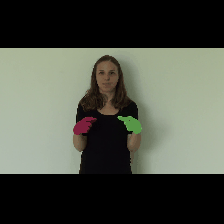

In [17]:
idx, row = next(subset_metadata_df.iterrows())

ucf_sample_video = frames_from_video_file(os.path.join(subset_path, row['sp'], row['gloss'], row['video_id']), 10)
to_gif(ucf_sample_video)

In [18]:
ucf_sample_video.shape

(10, 224, 224, 3)

In [19]:
fg = FrameGenerator(subset_paths['train'], 10, training=True)

frames, label = next(fg())
print(f"Shape: {frames.shape}")
print(f"Label: {label}")

Shape: (10, 224, 224, 3)
Label: 40


In [20]:
n_frames = 10
batch_size = 8

# We specify the shape of the output, such as, the Generator will produce a tuple of both
# videos, class, where the videos will have 3 channels, and the rest of dimensions will remain the same.
#   VideoShape -> (F, H, W, C)
output_signature = (tf.TensorSpec(shape=(None, None, None, 3), dtype=tf.float32),
                    tf.TensorSpec(shape=(), dtype=tf.int16))

train_ds = tf.data.Dataset.from_generator(FrameGenerator(subset_paths['train'], n_frames, training=True),
                                          output_signature=output_signature)
# Also, we batchify the data, so the training process is not as memory consuming as if the whole dataset was 
# loaded into memory.
# VideoShape -> (B, F, H, W, C)
# train_ds = train_ds.batch(batch_size)
train_ds = train_ds.batch(batch_size)

# We reproduce this process for the validation and test splits too.
val_ds = tf.data.Dataset.from_generator(FrameGenerator(subset_paths['val'], n_frames),
                                        output_signature=output_signature)

val_ds = val_ds.batch(batch_size)
test_ds = tf.data.Dataset.from_generator(FrameGenerator(subset_paths['test'], n_frames),
                                         output_signature=output_signature)

test_ds = test_ds.batch(batch_size)

In [21]:
'''
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
'''

'\nAUTOTUNE = tf.data.AUTOTUNE\n\ntrain_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)\nval_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)\n'

In [22]:
# Print the shapes of the data
train_frames, train_labels = next(iter(train_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

val_frames, val_labels = next(iter(val_ds))
print(f'Shape of validation set of frames: {val_frames.shape}')
print(f'Shape of validation labels: {val_labels.shape}')

Shape of training set of frames: (8, 10, 224, 224, 3)
Shape of training labels: (8,)
Shape of validation set of frames: (8, 10, 224, 224, 3)
Shape of validation labels: (8,)


In [23]:
(None, *train_frames.shape[2:])

(None, 224, 224, 3)

# 3. Model definition and Training

In [24]:
model = tf.keras.Sequential([
    # Construct the input layer with no definite frame size.
    tf.keras.layers.InputLayer(input_shape=(None, *train_frames.shape[2:])),
    # We will construct 3 `ConvLSTM2D` layers with batch normalization,
    tf.keras.layers.ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        return_sequences=True,
        activation="relu",
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        return_sequences=True,
        activation="relu",
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        return_sequences=True,
        activation="relu",
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling3D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer=tf.keras.optimizers.Adam(),
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_3 (ConvLSTM2D)  (None, None, 224, 224, 6  154624    
                             4)                                  
                                                                 
 batch_normalization_2 (Batc  (None, None, 224, 224, 6  256      
 hNormalization)             4)                                  
                                                                 
 conv_lstm2d_4 (ConvLSTM2D)  (None, None, 224, 224, 6  295168    
                             4)                                  
                                                                 
 batch_normalization_3 (Batc  (None, None, 224, 224, 6  256      
 hNormalization)             4)                                  
                                                                 
 conv_lstm2d_5 (ConvLSTM2D)  (None, None, 224, 224, 6 

In [29]:
# Define some callbacks to improve training.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20

# Fit the model to the training data using a generator.
model.fit_generator(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/20


/tmp/ipykernel_30944/4171469665.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


: 

: 